In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("hotel_bookings.csv")
df.head(3)

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN


is_canceled : y값

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [3]:
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [4]:
df.dropna(subset=['lead_time'], inplace=True)
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [5]:
df.is_repeated_guest.value_counts()

0.0    18888
1.0      749
Name: is_repeated_guest, dtype: int64

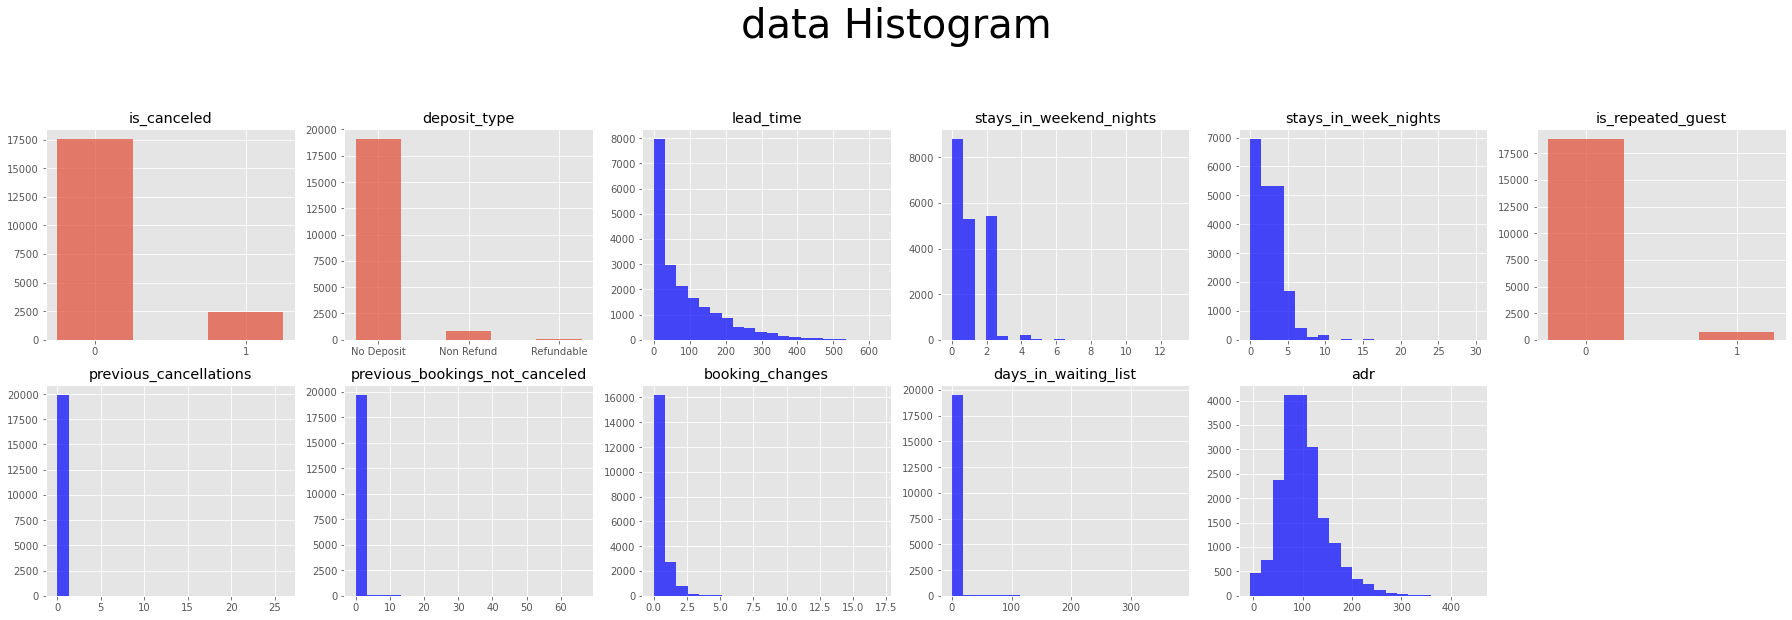

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(25,20))
plt.suptitle("data Histogram", fontsize=40)

cols=df.columns
for i in range(len(cols)):
    plt.subplot(5,6,i+1)
    plt.title(cols[i])
    if len(df[cols[i]].unique())>10:
        plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
        
    else:
        temp=df[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [7]:
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [8]:
df['is_repeated_guest']=df['is_repeated_guest'].fillna(0)
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [10]:
fill_mean_func=lambda g: g.fillna(g.mean())
df=df.groupby('deposit_type').apply(fill_mean_func)
df.index=df.index.droplevel(0)
df.sort_index(inplace=True)

df.isna().sum()

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_1172/3270320884.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fill_mean_func=lambda g: g.fillna(g.mean())


is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

- 데이터 불균형 시각화

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path="C:/Windows/Fonts/NGULIM.TTF"
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

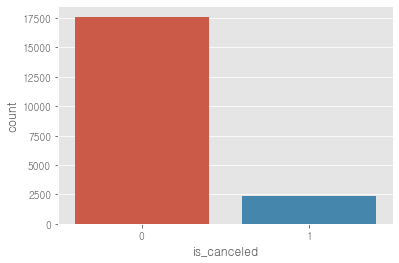

In [12]:
sns.countplot(x='is_canceled', data=df)
plt.show()

불균형 확인->오버샘플링

In [13]:
df=pd.get_dummies(df)

In [14]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time

X=df.drop(columns=['is_canceled'])
y=df[['is_canceled']]

start=time.time()
ros=RandomOverSampler(random_state=42)
X_ro, y_ro=ros.fit_resample(X, y)
print("time :", time.time() - start)

time : 0.043845415115356445


In [15]:
start=time.time()
sm=SMOTE(random_state=42)
X_sm, y_sm=sm.fit_resample(X, y)
print("time :", time.time()-start)

time : 0.09323549270629883


랜덤오버샘플링이 더 빠르게 끝남

- 분류알고리즘

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

start=time.time()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)
clf=RandomForestClassifier(n_estimators=100, min_samples_split=10)
clf.fit(X_train, y_train)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_1172/3803061842.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(min_samples_split=10)

In [22]:
print(clf.score(X_train, y_train))
print(classification_report(y_test, clf.predict(X_test)))
print(time.time()-start)

0.9337334333583396
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3519
           1       0.98      0.44      0.61       480

    accuracy                           0.93      3999
   macro avg       0.96      0.72      0.78      3999
weighted avg       0.94      0.93      0.92      3999

40.84096336364746


train 성능 : 0.93, test 성능 : 0.93(but, macro avg : 0.78)

In [24]:
start=time.time()
X_ro_train, X_ro_test, y_ro_train, y_ro_test=train_test_split(X_ro, y_ro, test_size=0.2, stratify=y_ro, random_state=100)
clf_ro=RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf_ro.fit(X_ro_train, y_ro_train)

print(clf_ro.score(X_ro_train, y_ro_train))
pred_ro=clf_ro.predict(X_ro_test)
print(classification_report(y_ro_test, pred_ro))
print(time.time()-start)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_1172/4188789263.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_ro.fit(X_ro_train, y_ro_train)


0.9853651605569764
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3519
           1       0.94      0.98      0.96      3519

    accuracy                           0.95      7038
   macro avg       0.96      0.95      0.95      7038
weighted avg       0.96      0.95      0.95      7038

8.032050609588623


train 성능 : 0.98, test 성능 : 0.95

In [25]:
start=time.time()
X_sm_train, X_sm_test, y_sm_train, y_sm_test=train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=100)
clf_sm=RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf_sm.fit(X_sm_train, y_sm_train)
print(clf_sm.score(X_sm_train, y_sm_train))
pred_sm=clf_sm.predict(X_sm_test)
print(classification_report(y_sm_test, pred_sm))
print(time.time()-start)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_1172/934447508.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_sm.fit(X_sm_train, y_sm_train)


0.9636970730321114
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3519
           1       0.91      0.87      0.89      3519

    accuracy                           0.89      7038
   macro avg       0.89      0.89      0.89      7038
weighted avg       0.89      0.89      0.89      7038

8.096555948257446


train 성능 : 0.96, test 성능 : 0.89

속도 측면에서는 원본 데이터세트의 모델링 수행속도가 가장 빠르지만, 이는 원본 데이터가 오버 샘플링 데이터들에 비해 사이즈가 작기 때문이다.

이점을 감안한다면 RandomOversampling 방식의 모델링 수행속도가 SMOTE보다 빠르기 때문에, RandomOverSampling방식이 속도 측면에서 우수하다.